In [ ]:
import pandas as pd
df = pd.read_csv("insurance.csv")

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **EDA**

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

In [ ]:
fig = px.histogram(df, x="age", nbins=47, marginal="box", color_discrete_sequence=["sky blue"])
fig.update_layout(bargap=0.2)
fig

In [ ]:
fig = px.histogram(df, x="bmi",  marginal="box", color_discrete_sequence=["sky blue"])
fig.update_layout(bargap=0.2)
fig

In [ ]:
fig = px.histogram(df, x="charges",  marginal="box", color_discrete_sequence=["sky blue"], color="smoker")
fig.update_layout(bargap=0.2)
fig

In [ ]:
fig = px.histogram(df, x="sex",  marginal="box", color_discrete_sequence=["sky blue"], color="region")
fig.update_layout(bargap=0.2)
fig

In [ ]:
fig = px.histogram(df, x="smoker",  marginal="box", color_discrete_sequence=["sky blue"], color="sex")
fig.update_layout(bargap=0.2)
fig

In [ ]:
fig = px.scatter(df, x="age", y="charges", color="smoker", hover_data="sex")
fig.show()

In [ ]:
fig = px.violin(df, x="sex", y="charges", color="smoker", hover_data="sex")
fig.show()

In [ ]:
fig = px.violin(df, x="region", y="charges", color="smoker", hover_data="sex")
fig.show()

In [ ]:
fig = px.violin(df, x="children", y="charges")
fig.show()

## Co - relation coefficients

> Add blockquote



In [ ]:
print(df.charges.corr(df.age))
print(df.charges.corr(df.bmi))

print(df.charges.corr(df.children))


0.2990081933306476
0.19834096883362895
0.06799822684790478


In [ ]:
smoker_val = {"no": 0, "yes":1}
x=df["smoker"].map(smoker_val)
print(df.charges.corr(x))


0.787251430498478


In [ ]:
df.corr()

<ipython-input-91-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-92-5b8337ac2534>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

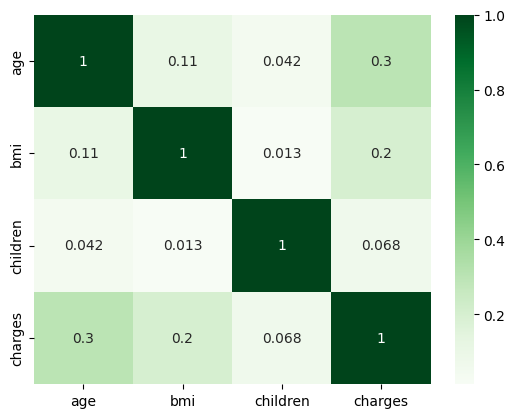

In [ ]:
sns.heatmap(df.corr(), cmap="Greens", annot=True)

## **Linear Regression (Non Smoker)**

In [ ]:
df_nonsmoke = df[df["smoker"]=="no"]
df_nonsmoke

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: xlabel='age', ylabel='charges'>

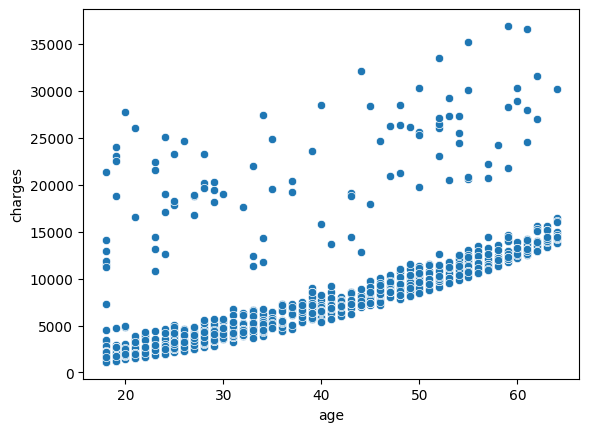

In [ ]:
sns.scatterplot(data=df_nonsmoke, x="age", y="charges")

Custom Model(Bad)

In [ ]:
w=100
b=20
def calculatePrice(w, b, age):
  return w*age+b

calculatePrice(w, b, 50)

5020

In [ ]:
cal_price = calculatePrice(w, b, df_nonsmoke["age"])
cal_price

1       1820
2       2820
3       3320
4       3220
5       3120
        ... 
1332    5220
1333    5020
1334    1820
1335    1820
1336    2120
Name: age, Length: 1064, dtype: int64

In [ ]:
df_nonsmoke["charges"]

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

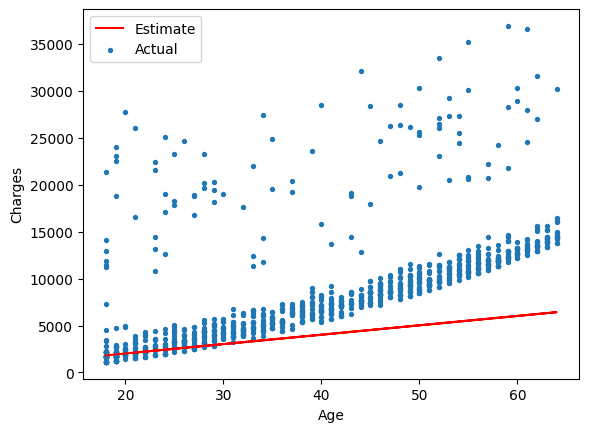

In [ ]:
plt.plot( df_nonsmoke["age"], cal_price, "r")
plt.scatter(df_nonsmoke["age"] ,df_nonsmoke["charges"], s=8)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(["Estimate", "Actual"])
plt.show()

In [ ]:
def try_Test(w, b):
  cal_price = calculatePrice(w, b, df_nonsmoke["age"])
  plt.plot( df_nonsmoke["age"], cal_price, "r")
  plt.scatter(df_nonsmoke["age"] ,df_nonsmoke["charges"], s=8)
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.legend(["Estimate", "Actual"])
  plt.show()


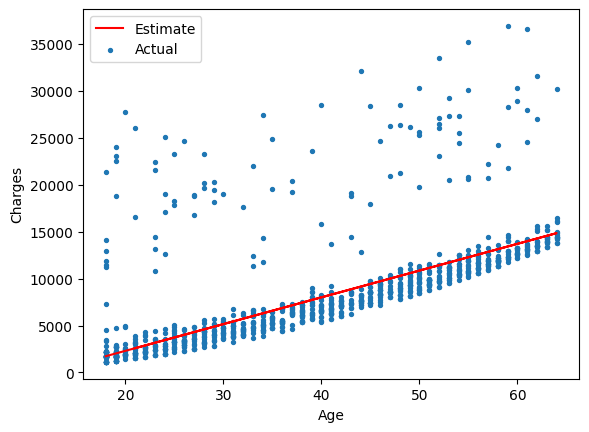

In [ ]:
try_Test(285, -3400)

In [ ]:
import numpy as np

def rmse(value, expectations):
  print(expectations, value)
  return np.sqrt((np.mean(np.square(value-expectations))))

rmse(df_nonsmoke["charges"], calculatePrice(285, -3400, df_nonsmoke["age"]))

1        1730
2        4580
3        6005
4        5720
5        5435
        ...  
1332    11420
1333    10850
1334     1730
1335     1730
1336     2585
Name: age, Length: 1064, dtype: int64 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


4708.802893644144

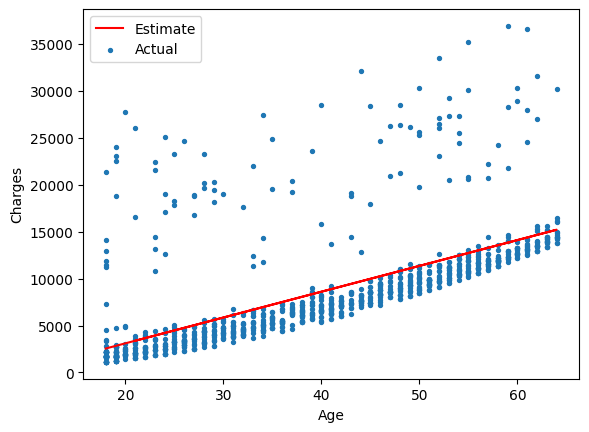

4663.783442791926


In [ ]:
def try_Test(w, b):
  expectations = calculatePrice(w, b, df_nonsmoke["age"])
  value = df_nonsmoke["charges"]
  plt.plot( df_nonsmoke["age"], expectations, "r")
  plt.scatter(df_nonsmoke["age"] ,df_nonsmoke["charges"], s=8)
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.legend(["Estimate", "Actual"])
  plt.show()
  print(np.sqrt((np.mean(np.square(value-expectations)))))

try_Test(275, -2400)

SKLearn Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
inp = df_nonsmoke[["age"]]
target = df_nonsmoke["charges"]

print(inp, target)


      age
1      18
2      28
3      33
4      32
5      31
...   ...
1332   52
1333   50
1334   18
1335   18
1336   21

[1064 rows x 1 columns] 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


In [ ]:
model.fit(inp, target)
model.predict(np.array([[23], [32], [39], [59]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  6460.54465403,  8331.28704385, 13676.26530048])

In [ ]:
predictions = model.predict(inp)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(predictions, target)

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64 [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


4662.505766636395

In [ ]:
print(model.coef_, model.intercept_)

[267.24891283] -2091.4205565650864


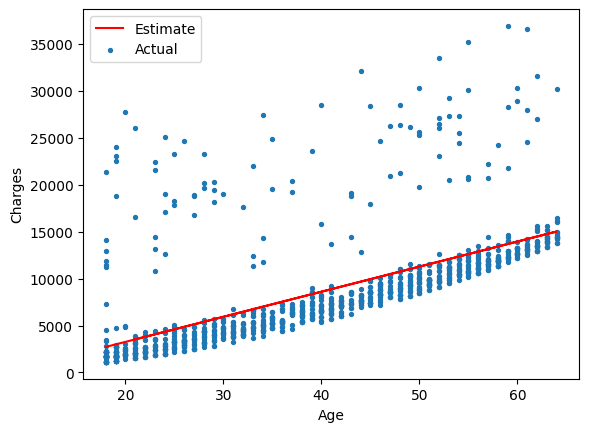

4662.505766636395


In [ ]:
try_Test(model.coef_, model.intercept_)

## **Linear Regression (Smokers) (Custom Encoding)**

In [ ]:
df_smoke = df[df["smoker"]=="yes"]
df_smoke

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [ ]:
inp = df_smoke[["age"]]
target = df_smoke["charges"]

# print(inp, target)
model = LinearRegression()
model.fit(inp, target)
model.predict(np.array([[21], [46]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([26704.11777122, 34335.05782397])

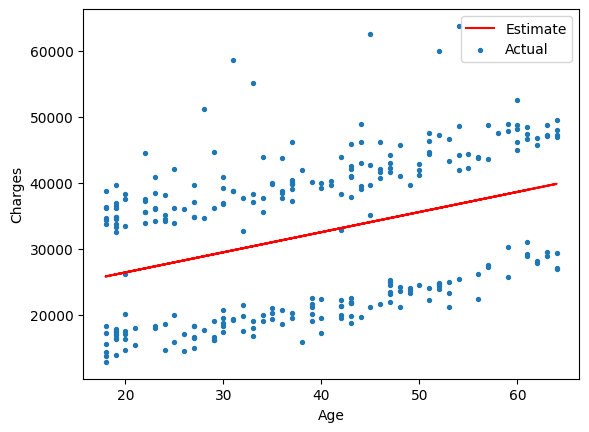

10711.00334810241


In [ ]:
def try_Test(w, b):
  expectations = calculatePrice(w, b, df_smoke["age"])
  value = df_smoke["charges"]
  plt.plot( df_smoke["age"], expectations, "r")
  plt.scatter(df_smoke["age"] ,df_smoke["charges"], s=8)
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.legend(["Estimate", "Actual"])
  plt.show()
  print(np.sqrt((np.mean(np.square(value-expectations)))))

try_Test(model.coef_, model.intercept_)


Age and BMI both (Non smokers)

In [ ]:
inp = df_nonsmoke[["age", "bmi"]]
model = LinearRegression().fit(inp, df_nonsmoke["charges"])
prediction = model.predict(inp)
print(model.coef_, model.intercept_)
rmse(df_nonsmoke["charges"], prediction)

[266.87657817   7.07547666] -2293.6320906488727
[2749.08516308 5412.40282772 6673.94368635 ... 2735.99553127 2770.87763119
 3493.32334862] 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


4662.3128354612945

3 inputs

In [ ]:
inp = df_nonsmoke[["age", "bmi", "children"]]
model = LinearRegression().fit(inp, df_nonsmoke["charges"])
prediction = model.predict(inp)
print(model.coef_, model.intercept_)
rmse(df_nonsmoke["charges"], prediction)

[265.2938443    5.27956313 580.65965053] -2809.2976032235892
[2724.94209163 6535.13457204 6065.27173951 ... 2134.51524931 2160.54349555
 2898.08585583] 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


4608.470405038247

## **Linear Regression Whole DataFrame (Without Lib)**

In [ ]:
smoker_encode = {"yes": 1, "no": 0}
df["smoker"] = df["smoker"].map(smoker_encode)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [ ]:
df["charges"].corr(df["smoker"])

0.787251430498478

In [ ]:
inp = df[["age", "bmi", "children", "smoker"]]
model = LinearRegression().fit(inp, df["charges"])
prediction = model.predict(inp)
print(model.coef_, model.intercept_)
rmse(df["charges"], prediction)

[  257.84950728   321.85140247   473.50231561 23811.3998446 ] -12102.7693627279
[25587.42524891  3880.94594512  7158.62006921 ...  4398.7459491
  1615.83647369 36793.67069541] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


6056.439217188081

In [ ]:
sex_encode = {"male": 1, "female": 0}
# print(df)
# df["sex"].astype(int)
df["sex"] = df["sex"].map(sex_encode)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [ ]:
df["charges"].corr(df["sex"])

0.057292062202025484

In [ ]:
inp = df[["age", "bmi", "children", "smoker", "sex"]]
model = LinearRegression().fit(inp, df["charges"])
prediction = model.predict(inp)
print(model.coef_, model.intercept_)
rmse(df["charges"], prediction)

[  257.73498767   322.36421449   474.41112061 23823.39253065
  -128.63985357] -12052.461985664737
[25661.85689486  3818.77858262  7096.73025538 ...  4465.88909619
  1676.96948913 36863.89250792] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


6056.100708754546

## **Linear Regression (Main)**

In [ ]:
from sklearn import preprocessing
one_hot_enc = preprocessing.OneHotEncoder()
one_hot_enc.fit(df[["region"]])

OneHotEncoder()

In [ ]:
onehot = one_hot_enc.transform(df[["region"]]).toarray()
onehot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
df[["northeast", "northwest", "southeast", "southwest"]] = onehot
df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [ ]:

inp = df[["age", "bmi", "children", "smoker", "sex", "northeast", "northwest", "southeast", "southwest"]]
model = LinearRegression().fit(inp, df["charges"])
prediction = model.predict(inp)
print(model.coef_, model.intercept_)
rmse(df["charges"], prediction)

[  256.85635254   339.19345361   475.50054515 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627] -12525.547811195444
[25293.7130284   3448.60283431  6706.9884907  ...  4149.13248568
  1246.58493898 37085.62326757] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


6041.6796511744515

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ["age", "bmi", "children"]
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inp = scaler.transform(df[numeric_cols])
scaled_inp

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ["smoker", "sex", "northeast", "northwest", "southeast", "southwest"]
data = df[cat_cols].values
inputs1 = np.concatenate((scaled_inp, data), axis=1)
inputs1


array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:

model = LinearRegression().fit(inputs1, df["charges"])
prediction = model.predict(inputs1)
print(rmse(df["charges"], prediction))
print(model.coef_)

[25293.7130284   3448.60283431  6706.9884907  ...  4149.13248568
  1246.58493898 37085.62326757] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
6041.6796511744515
[ 3607.47273619  2067.69196584   572.99820995 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]


In [ ]:
weights_df = pd.DataFrame(
    {
        "feature": np.append(numeric_cols + cat_cols, 1),
        "weight":np.append(model.coef_, model.intercept_)

    }
)
weights_df

,feature,weight
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,smoker,23848.534542
4,sex,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,8466.483215


NON smoker

In [ ]:

print(df_nonsmoke)
one_hot_enc = preprocessing.OneHotEncoder()
one_hot_enc.fit(df_nonsmoke[["region"]])
onehot = one_hot_enc.transform(df_nonsmoke[["region"]]).toarray()
df_nonsmoke[["northeast", "northwest", "southeast", "southwest"]] = onehot


      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]


<ipython-input-133-9f8bfcd63d67>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-133-9f8bfcd63d67>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-133-9f8bfcd63d67>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-133-9f8

In [ ]:
sex_encode = {"male": 1, "female": 0}
df_nonsmoke["sex"] = df_nonsmoke["sex"].map(sex_encode)
df_nonsmoke

<ipython-input-134-2f1c0a8f31fc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
1,18,1,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0
5,31,0,25.740,0,no,southeast,3756.62160,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,0,44.700,3,no,southwest,11411.68500,0.0,0.0,0.0,1.0
1333,50,1,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0


In [ ]:

inp = df_nonsmoke[["age", "bmi", "children","sex", "northeast", "northwest", "southeast", "southwest"]]

model = LinearRegression().fit(inp, df_nonsmoke["charges"])
prediction = model.predict(inp)
print(model.coef_, model.intercept_)
rmse(df_nonsmoke["charges"], prediction)

[ 264.48143811   18.98046182  587.45825749 -525.97048681  733.68301887
  185.554256   -258.36537156 -660.87190331] -2940.7471545563076
[2264.01132619 6069.12726666 5877.67545787 ... 3159.45809157 2260.98337791
 2442.18705738] 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


4573.074988795492

Smoker

In [ ]:


one_hot_enc = preprocessing.OneHotEncoder()
one_hot_enc.fit(df_smoke[["region"]])
onehot = one_hot_enc.transform(df_smoke[["region"]]).toarray()
df_smoke[["northeast", "northwest", "southeast", "southwest"]] = onehot
sex_encode = {"male": 1, "female": 0}
df_smoke["sex"] = df_smoke["sex"].map(sex_encode)
df_smoke

In [ ]:
inp = df_smoke[["age", "bmi", "children","sex", "northeast", "northwest", "southeast", "southwest"]]

model = LinearRegression().fit(inp, df_smoke["charges"])
prediction = model.predict(inp)
# print(model.coef_, model.intercept_)
rmse(df_smoke["charges"], prediction)

[23140.75355179 30806.65871977 44432.02632867 36613.11781244
 33702.13286862 38721.54092967 34916.54641141 37884.14578333
 40590.25734779 51422.75929701 36795.87114087 30837.65021784
 35476.96445533 46654.10726179 26971.40812205 23551.14519646
 15068.33340255 18466.48718554 19175.16493119 36623.03015756
 38500.77045113 22431.67868538 37858.56449829 37280.70361097
 40556.27917547 21351.88997791 15143.62282539 36443.69462151
 23133.38155955 43670.74299969 24599.70081338 35146.99407341
 23730.97180371 11773.99423191 21835.8971838  27154.13636703
 34095.9664088  23042.71627311 23915.60533586 18900.24921628
 35495.63833064 27119.01063262 34622.62757572 49366.89371886
 48932.86075099 35893.09691699 27596.37142414 32933.89674881
 22635.79905693 19283.76461015 24225.18580588 37952.26291211
 35106.34278659  7631.04502637 41616.86585605 40331.0964704
 37269.56801447 40847.63616899 28430.49085085 20569.96114436
 27278.61648696 35859.86309696 50385.53935769 15142.08598672
 40703.57844577 29699.485

5668.4678821121515